In [11]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler

In [2]:
X, y = load_iris(return_X_y=True, as_frame=True)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2011, test_size= 0.2)

X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
13,4.3,3.0,1.1,0.1
29,4.7,3.2,1.6,0.2
45,4.8,3.0,1.4,0.3
3,4.6,3.1,1.5,0.2
64,5.6,2.9,3.6,1.3
...,...,...,...,...
99,5.7,2.8,4.1,1.3
59,5.2,2.7,3.9,1.4
40,5.0,3.5,1.3,0.3
77,6.7,3.0,5.0,1.7


In [4]:
df_train = X_train.copy()

df_train['specie'] = y_train.copy()

df_train.info()


<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 13 to 43
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
 4   specie             120 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.6 KB


In [10]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),120.0,5.838333,0.859762,4.3,5.100,5.80,6.4,7.9
sepal width (cm),120.0,3.066667,0.427094,2.0,2.800,3.00,3.3,4.2
petal length (cm),120.0,3.751667,1.805407,1.0,1.575,4.35,5.1,6.9
petal width (cm),120.0,1.199167,0.783388,0.1,0.200,1.30,1.8,2.5
specie,120.0,1.000000,0.830106,0.0,0.000,1.00,2.0,2.0


/workspaces/KNN_Algorithm/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


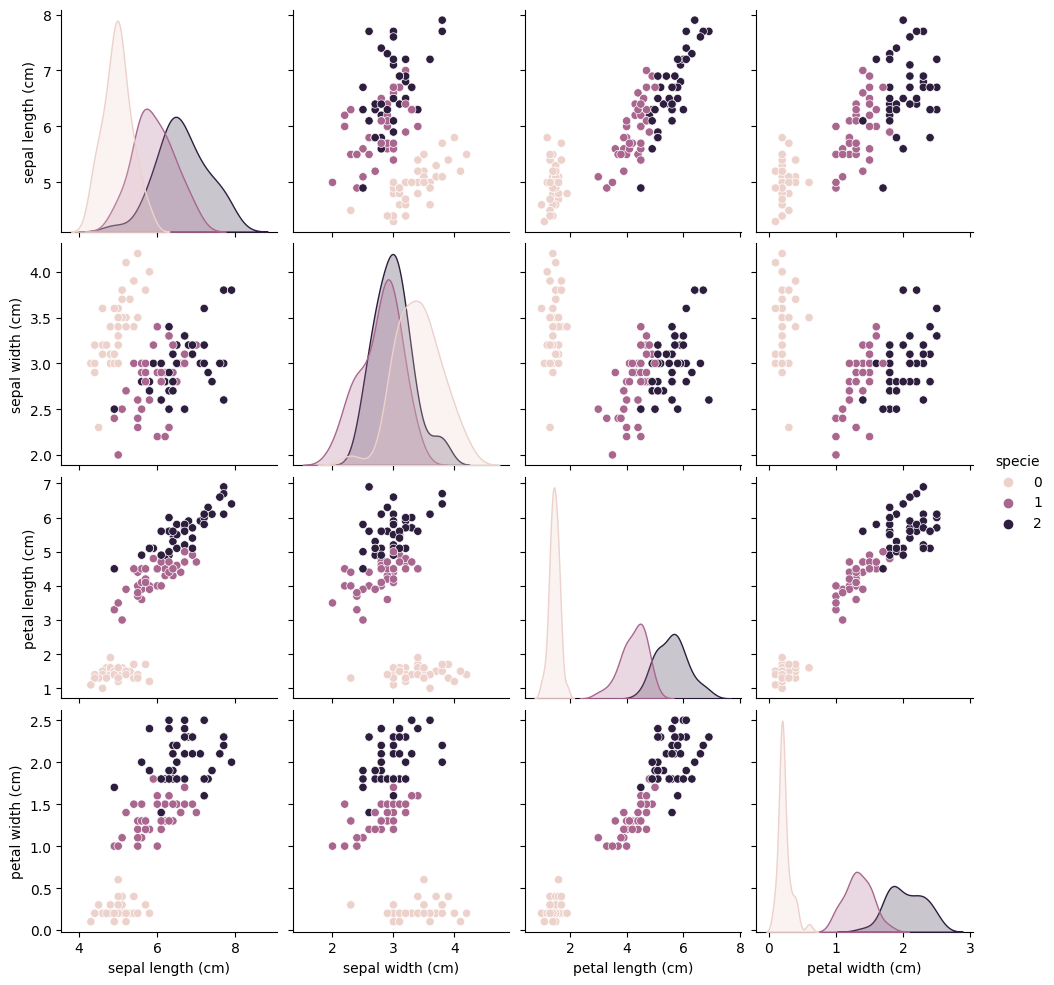

In [5]:
sns.pairplot(data=df_train, hue='specie')
plt.show()

In [6]:
df_train.drop(['specie'], axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.086887,0.877693,0.827499
sepal width (cm),-0.086887,1.000000,-0.388557,-0.342166
petal length (cm),0.877693,-0.388557,1.000000,0.965120
petal width (cm),0.827499,-0.342166,0.965120,1.000000


In [12]:
scaler = MinMaxScaler()

X_train_sc = scaler.fit_transform(X_train)

X_test_sc = scaler.transform(X_test)

In [13]:
model = KNeighborsClassifier()
model.fit(X_train_sc, y_train)
y_hat = model.predict(X_test_sc)
print(f"Accuray: {accuracy_score(y_test, y_hat):.2f}")

Accuray: 0.90
